# seaborn에 있는 데이터 셋으로 분석 연습하기(펭귄)


## 1.데이터 불러오기 

In [37]:
import seaborn as sns

data = sns.load_dataset("penguins")
data


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## 2. 데이터 전처리


In [38]:
type(data) #데이터 타입 확인
data.info() #데이터 전반적인 내용확인
data.head() #데이터 확인 위에서 5개


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [39]:
data.isnull() #결측지 확인




,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [40]:
#행별 결측지 갯수 확인
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [41]:
#결측지 행 삭제
data = data.dropna()
data
#11개 삭제됨

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [42]:
# column명 바꾸기
data = data.rename(columns={data.columns[2] : "bl",
                            data.columns[3] : "bd",
                            data.columns[4] : "fl",
                            data.columns[5] : "mass"})
data

,species,island,bl,bd,fl,mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## 3.데이터 시각화
### - histogram
sns.histplot() - 파라미터 값<br>
data= <- 데이터<br>
x= <- x축<br>
bins= <- x축 구간 개수<br>
hue= <- ~에 따라 색을 다르게<br>
multiple= <- 겹치는 옵션

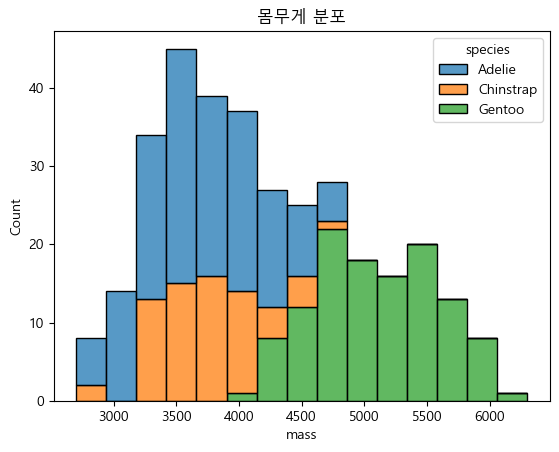

In [43]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic" # 한글폰트 지정
# 몸무게 분포를 히스토그램으로
plt.figure()
plt.title("몸무게 분포")
sns.histplot(data= data, x="mass",bins=15, hue="species", multiple= "stack")
plt.show()

### -distplot
#### 분포를 여러 subplot으로 나눠서 출력

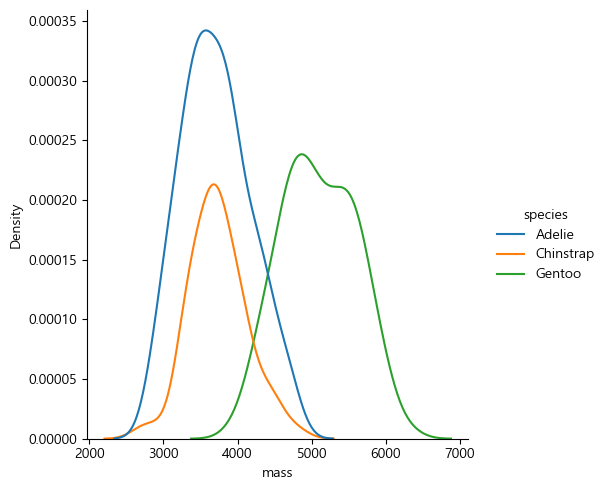

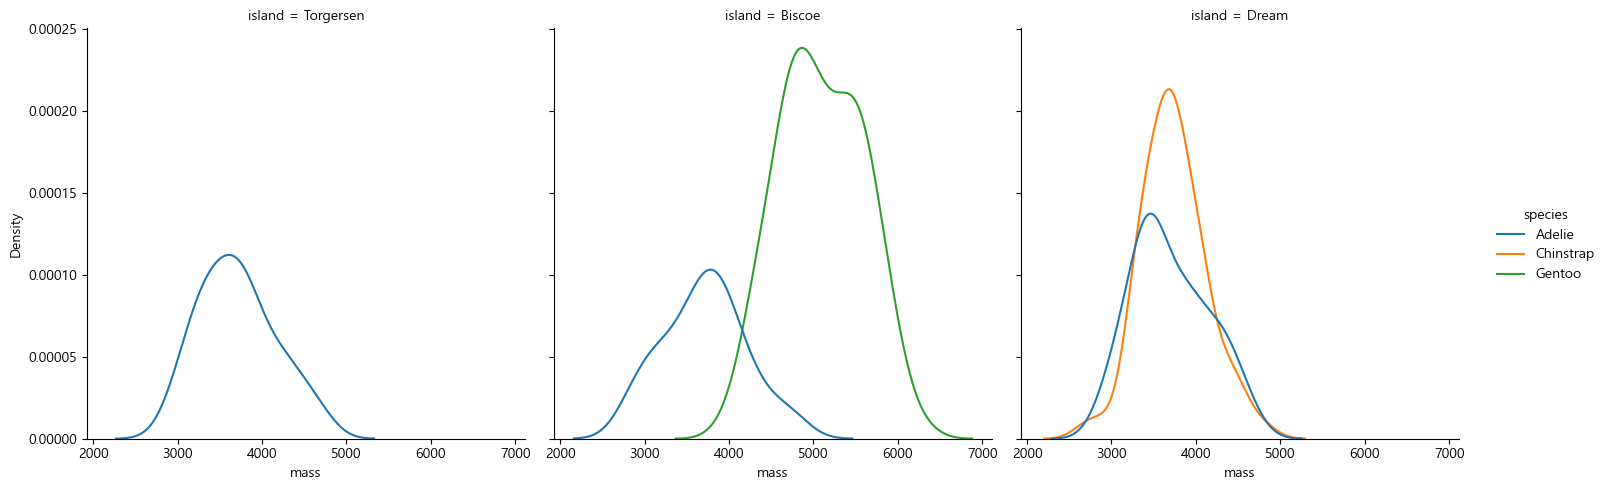

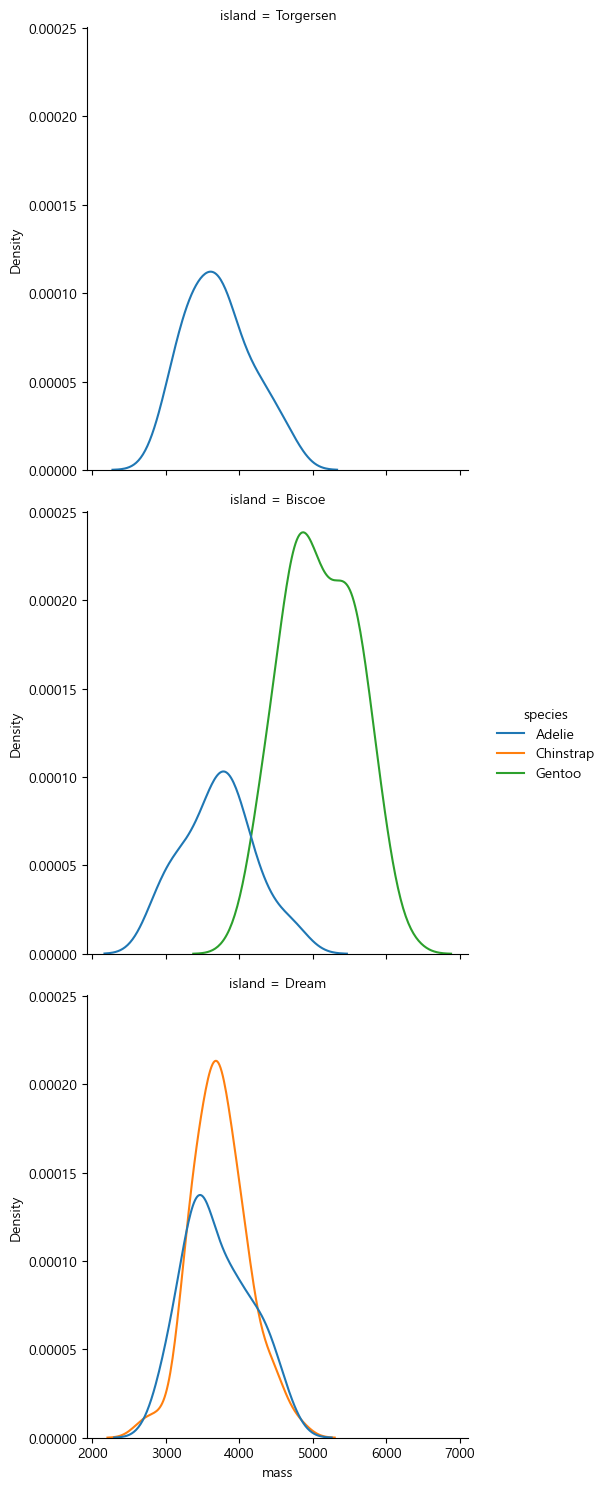

In [44]:
sns.displot(data=data,x="mass", hue="species", kind="kde")
#kind - hist, kde, ecdf 세종류가 있음

sns.displot(data=data, kind="kde",x="mass", hue="species", col="island")

sns.displot(data=data, kind="kde",x="mass", hue="species", row="island")

#서식지에 따른 종별 몸무게

### - barplot
어떤 데이터에 대한 값의 크기를 막대로 

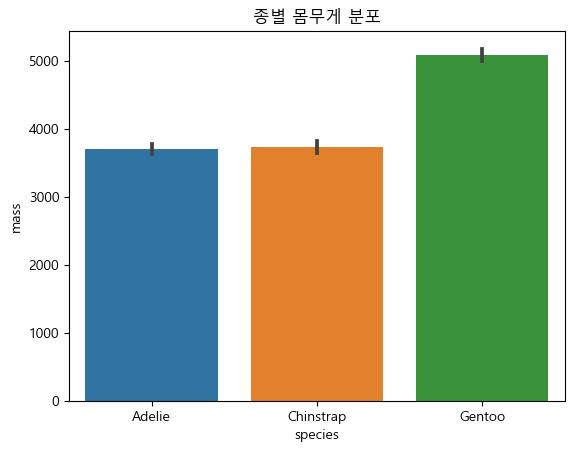

<Axes: xlabel='mass', ylabel='species'>

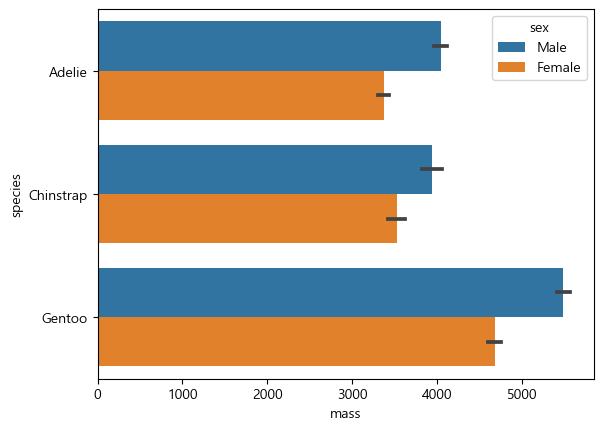

In [48]:
plt.title("종별 몸무게 분포")
sns.barplot(data= data, x= "species", y="mass")
plt.show()
sns.barplot(data= data, x="mass", y="species", hue="sex")

### -countplot
범주형 속성을 가지는 데이터들의 히스토그램

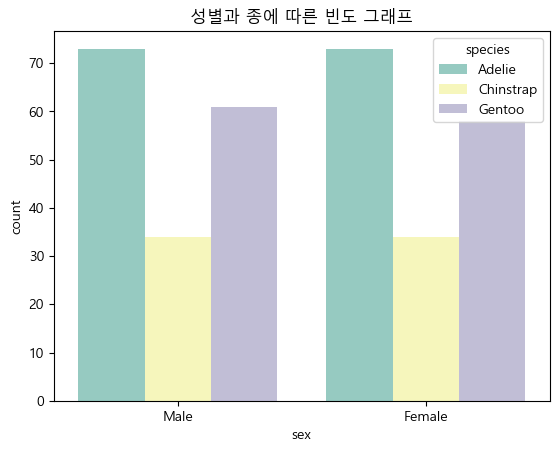

In [51]:
plt.figure()
plt.title("성별과 종에 따른 빈도 그래프")
sns.set_palette("Set3")
#색상을 설정할 수 있음 https://seaborn.pydata.org/tutorial/color_palettes.html
sns.countplot(data=data, x="sex",hue="species")
plt.show()

### -boxplot
데이터의 변수별로 사분위수 표시<br>
데이터의 전체적인 분포 확인 용이<br>
이상치 존재 유무 확인 편리


<Axes: title={'center': '종에 따른 부리 두께'}, xlabel='species', ylabel='bd'>

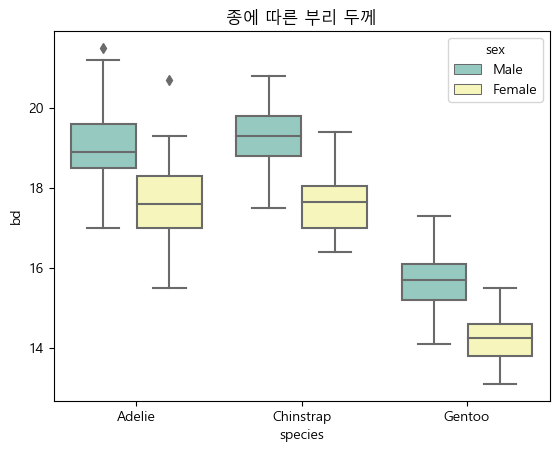

In [55]:
plt.title("종에 따른 부리 두께")
sns.boxplot(data=data, x="species",y="bd", hue="sex")

### -violineplot
변수에 대한 분포 자체를 보여줌<br>
평균 근처에 데이터가 얼마나 있는지 전체적으로 어떻게 퍼져있는지 확인

<Axes: xlabel='species', ylabel='bd'>

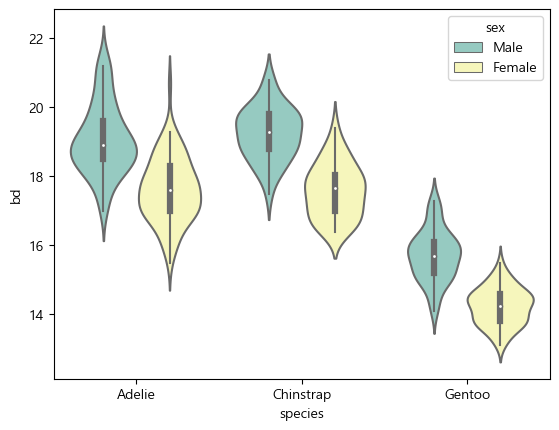

In [56]:
sns.violinplot(data=data, x= "species", y="bd", hue="sex")

### -lineplot
두 변수 간의 관계를 확인할 수 있는 plot<br>
수치형 지표들 간의 경향을 파악할때 사용

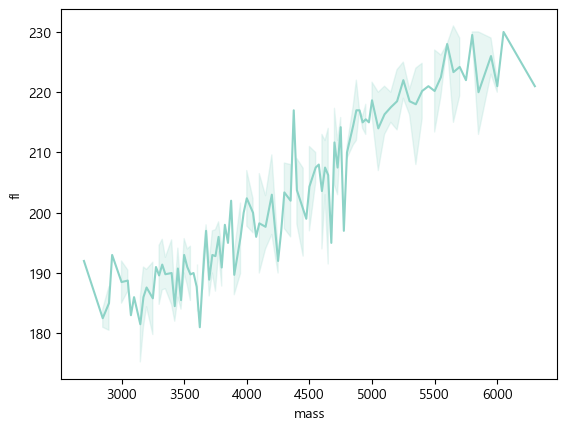

<Axes: xlabel='mass', ylabel='fl'>

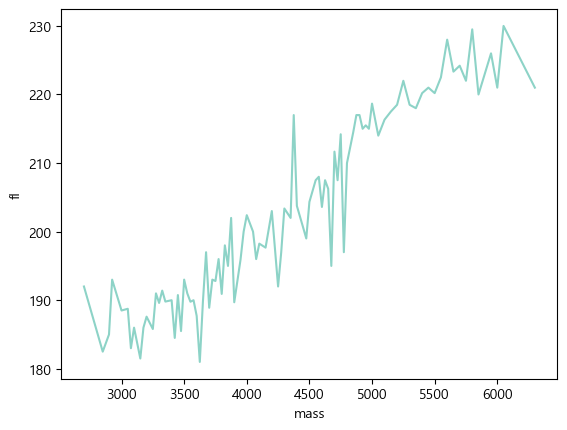

In [62]:
sns.lineplot(data=data, x="mass",y="fl")
# 백그라운드 = 해당범위에 있는 수치값의 에러에 대한 허용 범위
plt.show()
sns.lineplot(data=data, x="mass",y="fl",errorbar=None)
#에러바 없에기 ci= none